In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import warnings
import itertools
import os 

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

path = "H://Personal_photos//Insofe//Insofe_week7//TimeSeries"
os.chdir(path)
os.getcwd()

df = pd.read_excel("Superstore.xls")

C:\Users\HP\Anaconda2\envs\py36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 
        'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis = 1, inplace= True)
furniture = pd.DataFrame(furniture.sort_values('Order Date'))
furniture.isnull().sum()
furniture['month'] =  pd.DatetimeIndex(furniture['Order Date']).month
furniture['year_month']= pd.to_datetime(furniture['Order Date']).dt.to_period('M')
furniture1 = furniture.groupby('year_month')['Sales'].sum().reset_index()
furniture1 = furniture1.set_index('year_month')


In [6]:
furniture1.head()
y = furniture1

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
y.interpolate(inplace = True)
y.index =y.index.to_timestamp()


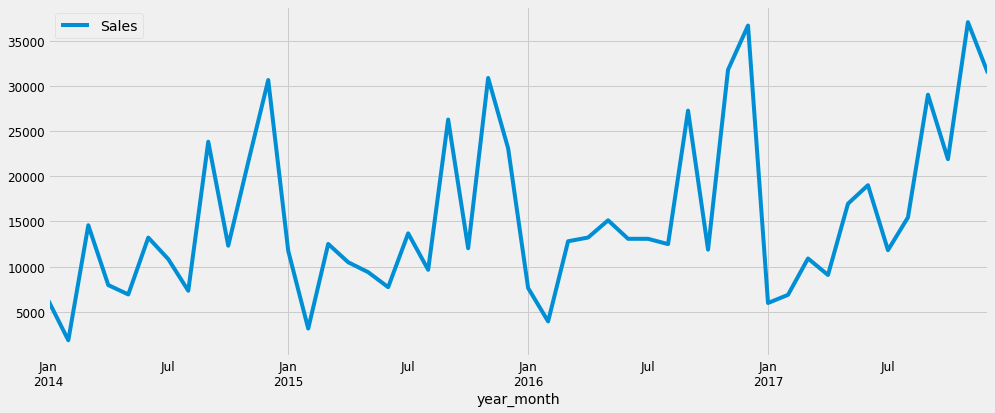

In [8]:
y.plot(figsize=(15,6))
plt.show()

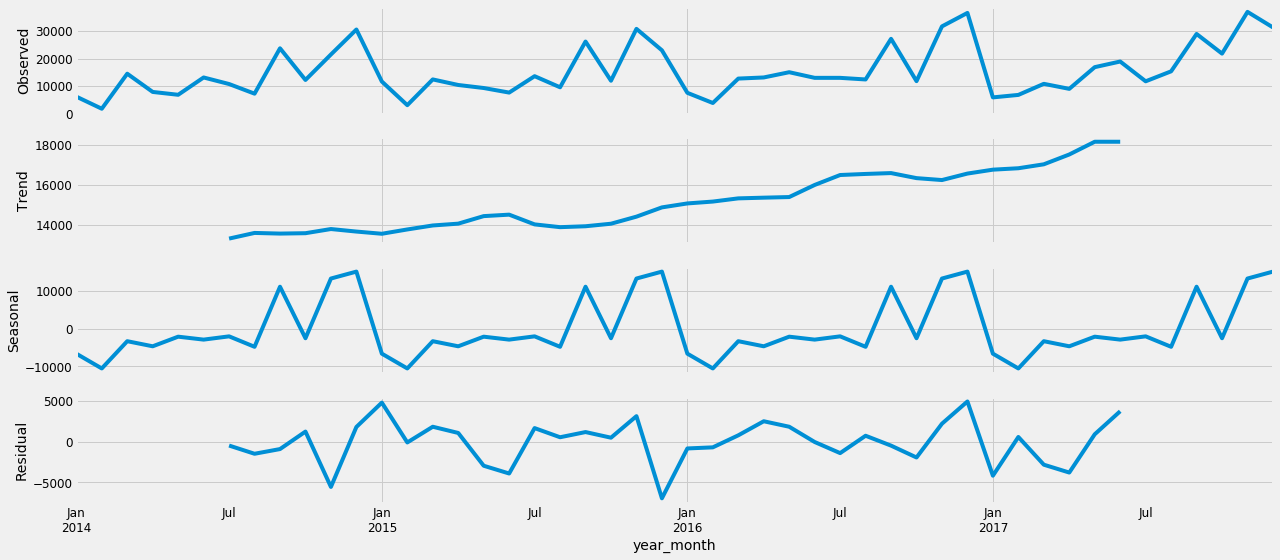

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive', freq= 12)
fig = decomposition.plot()
plt.show()

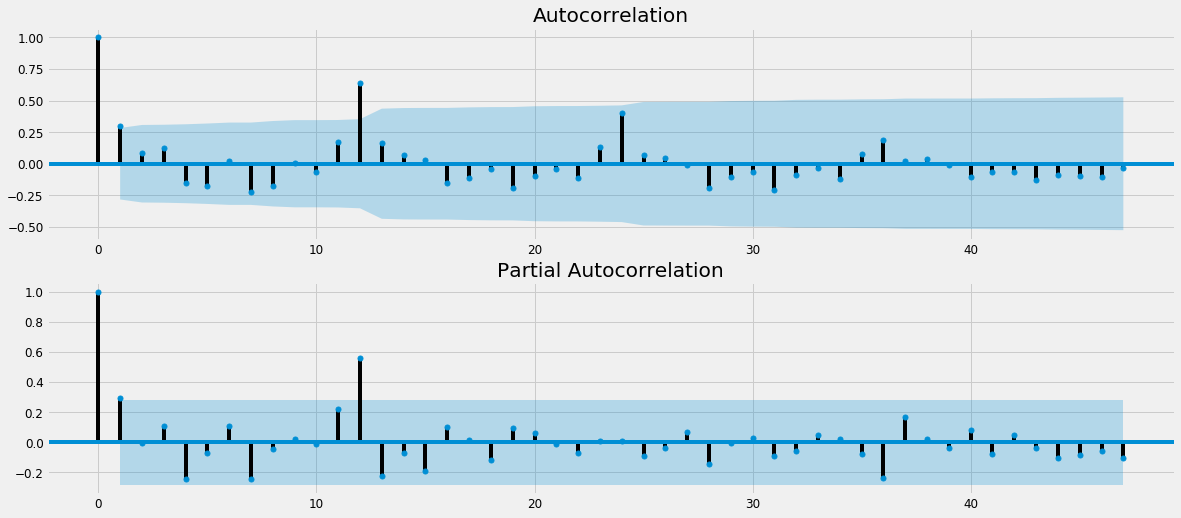

In [139]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure()
pyplot.subplot(211)
plot_acf(y, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(y, ax=pyplot.gca())
pyplot.show()

In [10]:
p = q = range(0, 4)
d =range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 0, 3, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)


In [11]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1262.6426899268613
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:711.2492842040824
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1319.4511998609873
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:475.92673489624383
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:468.7903252379066
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:761.5079654868366
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:241.1664941458231
ARIMA(0, 0, 0)x(3, 0, 0, 12)12 - AIC:242.52469646619127
ARIMA(0, 0, 0)x(3, 0, 1, 12)12 - AIC:511.60924625560557
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1015.7594088766109
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5592.173158408425
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:674.6304760632347
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:779.6594254270497
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:12352780042.63942
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:476.7816341414886
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:523.1713597447183
ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:823.9130717281504
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:243.32309994565315
ARI

ARIMA(1, 1, 1)x(3, 0, 1, 12)12 - AIC:209.68447178369786
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:933.0684257070675
ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:3359.1052802399927
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:645.5202066489999
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:703.5478970853768
ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:3395.279373443709
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:440.2060132750021
ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:459.4408972365767
ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:459.0261550695202
ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:208.0048888823371
ARIMA(1, 1, 2)x(3, 0, 0, 12)12 - AIC:217.62037585938432
ARIMA(1, 1, 2)x(3, 0, 1, 12)12 - AIC:219.61631504324316
ARIMA(1, 1, 3)x(0, 0, 0, 12)12 - AIC:911.6966755672312
ARIMA(1, 1, 3)x(0, 0, 1, 12)12 - AIC:3283.085655889767
ARIMA(1, 1, 3)x(0, 1, 0, 12)12 - AIC:628.1977382925683
ARIMA(1, 1, 3)x(1, 0, 0, 12)12 - AIC:705.5373848606531
ARIMA(1, 1, 3)x(1, 0, 1, 12)12 - AIC:20631146.92464532
ARIMA(1, 1, 3)x(1, 1, 0, 12)12 - AIC:438.80095542224916
ARIMA

ARIMA(3, 0, 3)x(1, 1, 0, 12)12 - AIC:420.54755365238793
ARIMA(3, 0, 3)x(2, 0, 0, 12)12 - AIC:442.97628941077994
ARIMA(3, 0, 3)x(2, 0, 1, 12)12 - AIC:750.6992694324138
ARIMA(3, 0, 3)x(2, 1, 0, 12)12 - AIC:187.2625683985703
ARIMA(3, 0, 3)x(3, 0, 0, 12)12 - AIC:201.08794834512753
ARIMA(3, 0, 3)x(3, 0, 1, 12)12 - AIC:303.78893188210634
ARIMA(3, 1, 0)x(0, 0, 0, 12)12 - AIC:936.0008944888172
ARIMA(3, 1, 0)x(0, 0, 1, 12)12 - AIC:3173.9445206144023
ARIMA(3, 1, 0)x(0, 1, 0, 12)12 - AIC:646.1183312077419
ARIMA(3, 1, 0)x(1, 0, 0, 12)12 - AIC:662.9751101502945
ARIMA(3, 1, 0)x(1, 0, 1, 12)12 - AIC:2872.800392921947
ARIMA(3, 1, 0)x(1, 1, 0, 12)12 - AIC:403.60759223759777
ARIMA(3, 1, 0)x(2, 0, 0, 12)12 - AIC:403.00348095584286
ARIMA(3, 1, 0)x(2, 0, 1, 12)12 - AIC:400.5705647676927
ARIMA(3, 1, 0)x(2, 1, 0, 12)12 - AIC:168.03370086661113
ARIMA(3, 1, 0)x(3, 0, 0, 12)12 - AIC:176.15137655678217
ARIMA(3, 1, 0)x(3, 0, 1, 12)12 - AIC:178.1513287237675
ARIMA(3, 1, 1)x(0, 0, 0, 12)12 - AIC:934.5062821416851
A

In [43]:
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:180.49000499312893

In [34]:
mod = sm.tsa.statespace.SARIMAX(y, order= (3,1,3), seasonal_order= (3,0,0,12), enforce_stationarity= False,
                                enforce_invertibility= False)

results = mod.fit()
print(results.summary())


                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(3, 1, 3)x(3, 0, 0, 12)   Log Likelihood                 -80.245
Date:                            Thu, 16 May 2019   AIC                            180.490
Time:                                    18:22:51   BIC                            199.202
Sample:                                01-01-2014   HQIC                           187.561
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7970     95.098     -0.008      0.993    -187.185     185.591
ar.L2         -0.1152     74.324   

In [36]:
residuals = pd.DataFrame(results.resid)


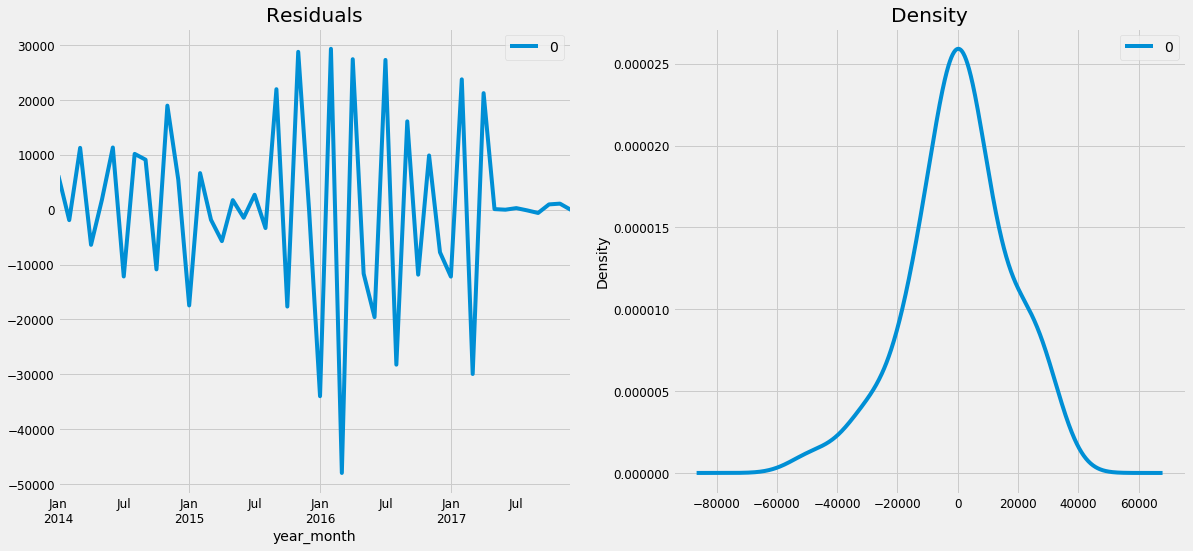

In [38]:
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

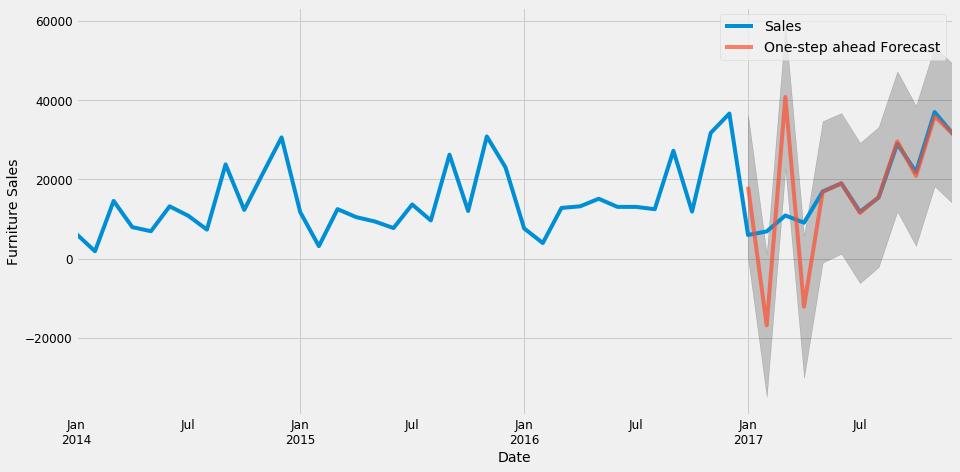

In [42]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

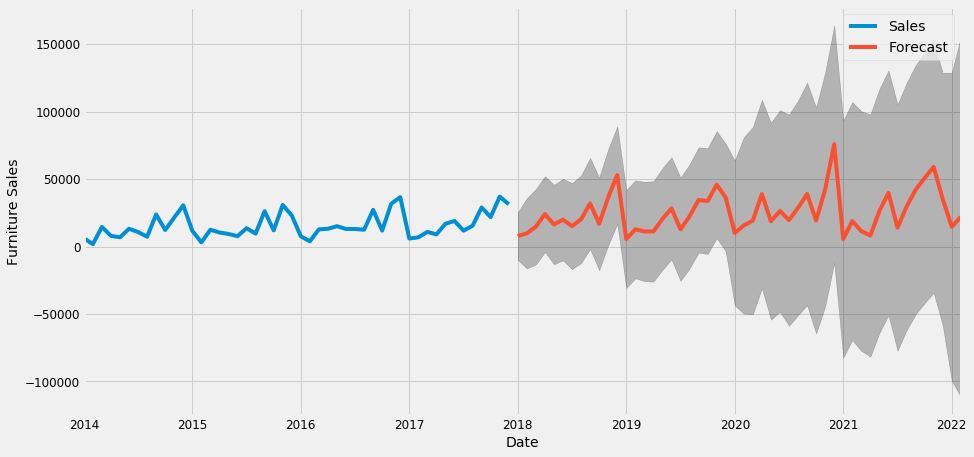

In [47]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()